<a href="https://colab.research.google.com/github/helloitsdaksh/Tensorflow_colab/blob/main/03_Convolutional_Neural_Networks_In_Tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Convolutional Neural Networks and Computer Vision 
Computer vision is a practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

Architecture of a CNN.
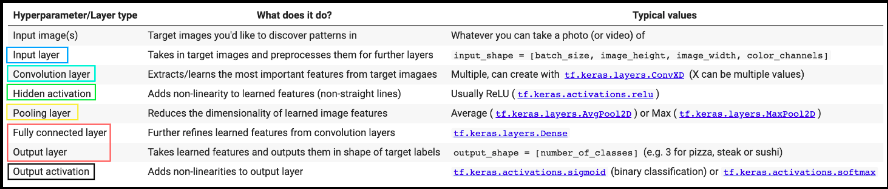

## Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes. 

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

> 🔑 **Note:** To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out [the preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

We'll download the `pizza_steak` subset .zip file and unzip it.

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-15 06:00:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   135MB/s    in 0.8s    

2021-07-15 06:00:02 (135 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
* A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

Let's inspect each of the directories we've downloaded.

To so do, we can use the command `ls` which stands for list.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [3]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [4]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names[1:]

array(['pizza', 'steak'], dtype='<U9')

In [6]:
# Let's Visualize our images
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


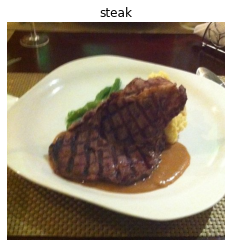

In [7]:
img = view_random_image("pizza_steak/train/","steak")

In [ ]:
# this image is actually a matrix of shape(widht, height, colour channels)
img

array([[[186, 179, 163],
        [186, 178, 165],
        [183, 175, 162],
        ...,
        [ 39,  24,  19],
        [ 34,  23,  19],
        [ 40,  29,  27]],

       [[189, 181, 168],
        [185, 177, 164],
        [181, 173, 160],
        ...,
        [ 38,  23,  18],
        [ 36,  22,  19],
        [ 39,  28,  26]],

       [[191, 183, 170],
        [186, 178, 165],
        [183, 175, 162],
        ...,
        [ 40,  25,  20],
        [ 38,  24,  21],
        [ 40,  29,  25]],

       ...,

       [[ 57,  32,  25],
        [ 60,  35,  28],
        [ 60,  35,  28],
        ...,
        [ 28,  16,  16],
        [ 29,  17,  17],
        [ 30,  20,  19]],

       [[ 49,  26,  20],
        [ 53,  28,  23],
        [ 54,  29,  24],
        ...,
        [ 28,  18,  17],
        [ 27,  17,  16],
        [ 28,  18,  17]],

       [[ 50,  27,  21],
        [ 48,  25,  19],
        [ 46,  21,  16],
        ...,
        [ 30,  20,  19],
        [ 28,  18,  17],
        [ 27,  17,  16]]

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[186, 179, 163],
        [186, 178, 165],
        [183, 175, 162],
        ...,
        [ 39,  24,  19],
        [ 34,  23,  19],
        [ 40,  29,  27]],

       [[189, 181, 168],
        [185, 177, 164],
        [181, 173, 160],
        ...,
        [ 38,  23,  18],
        [ 36,  22,  19],
        [ 39,  28,  26]],

       [[191, 183, 170],
        [186, 178, 165],
        [183, 175, 162],
        ...,
        [ 40,  25,  20],
        [ 38,  24,  21],
        [ 40,  29,  25]],

       ...,

       [[ 57,  32,  25],
        [ 60,  35,  28],
        [ 60,  35,  28],
        ...,
        [ 28,  16,  16],
        [ 29,  17,  17],
        [ 30,  20,  19]],

       [[ 49,  26,  20],
        [ 53,  28,  23],
        [ 54,  29,  24],
        ...,
        [ 28,  18,  17],
        [ 27,  17,  16],
        [ 28,  18,  17]],

       [[ 50,  27,  21],
        [ 48,  25,  19],
        [ 46,  21,  16],
        ...,
        [ 30,  20,  1

In [ ]:
# normalizztion of the image
img/255.0

array([[[0.72941176, 0.70196078, 0.63921569],
        [0.72941176, 0.69803922, 0.64705882],
        [0.71764706, 0.68627451, 0.63529412],
        ...,
        [0.15294118, 0.09411765, 0.0745098 ],
        [0.13333333, 0.09019608, 0.0745098 ],
        [0.15686275, 0.11372549, 0.10588235]],

       [[0.74117647, 0.70980392, 0.65882353],
        [0.7254902 , 0.69411765, 0.64313725],
        [0.70980392, 0.67843137, 0.62745098],
        ...,
        [0.14901961, 0.09019608, 0.07058824],
        [0.14117647, 0.08627451, 0.0745098 ],
        [0.15294118, 0.10980392, 0.10196078]],

       [[0.74901961, 0.71764706, 0.66666667],
        [0.72941176, 0.69803922, 0.64705882],
        [0.71764706, 0.68627451, 0.63529412],
        ...,
        [0.15686275, 0.09803922, 0.07843137],
        [0.14901961, 0.09411765, 0.08235294],
        [0.15686275, 0.11372549, 0.09803922]],

       ...,

       [[0.22352941, 0.1254902 , 0.09803922],
        [0.23529412, 0.1372549 , 0.10980392],
        [0.23529412, 0

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

## An end-to-end example

* Load out images
* Preprocess our images
* Build a CNN to find patterns in our iamges
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1, also called scaling/ normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories 
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data form directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               batch_size = 32,
                                               target_size =(224,224),
                                               class_mode = "binary",
                                               seed = 42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode = "binary",
                                             seed = 42)
# Build the CNN model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])
# compile the CNN model
model_1.compile(loss= "binary_crossentropy",
               optimizer= tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 201ms/step - loss: 0.6296 - accuracy: 0.6360 - val_loss: 0.4880 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4838 - accuracy: 0.7853 - val_loss: 0.4164 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4305 - accuracy: 0.8133 - val_loss: 0.3713 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3843 - accuracy: 0.8353 - val_loss: 0.3231 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3517 - accuracy: 0.8473 - val_loss: 0.2966 - val_accuracy: 0.8840


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

# compile the model
model_2.compile(loss= "binary_crossentropy",
               optimizer= tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 1.1372 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

# compile the model
model_3.compile(loss= "binary_crossentropy",
               optimizer= tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
# fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 2.9511 - accuracy: 0.6267 - val_loss: 1.9429 - val_accuracy: 0.5660
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.7750 - accuracy: 0.7200 - val_loss: 0.4788 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6595 - accuracy: 0.7447 - val_loss: 1.0494 - val_accuracy: 0.5640
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5907 - accuracy: 0.7613 - val_loss: 1.0280 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6534 - accuracy: 0.7413 - val_loss: 0.5675 - val_accuracy: 0.7260


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Become one with data


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


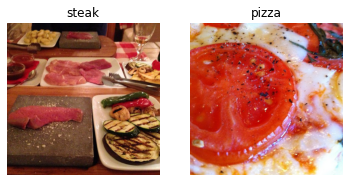

In [8]:
#visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data 

In [9]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20). 

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.


In [10]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
# Load in our image data from directories  and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [13]:
images.shape

(32, 224, 224, 3)

In [14]:
labels[:10]

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 1.], dtype=float32)

### 3. Create a model (start with a baseline)

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> 🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model_1` from above) and build a 3 layer convolutional neural network.

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential

In [16]:
#create a model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size =3,
           padding = 'valid',
           strides=1,
           activation= 'relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10,3,activation = 'relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

> 📖 **Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  * For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).

Now our model is ready, let's compile it.
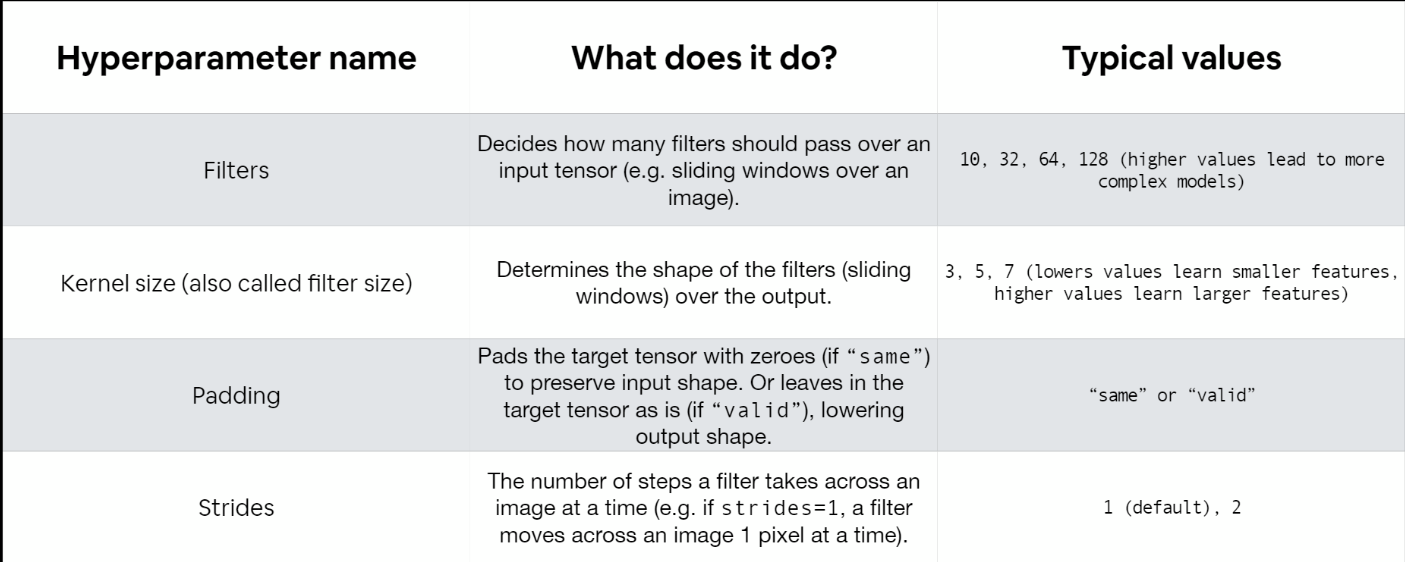

In [17]:
# compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics =['accuracy'])

In [18]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 42s 218ms/step - loss: 0.8131 - accuracy: 0.6607 - val_loss: 0.4036 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4311 - accuracy: 0.8020 - val_loss: 0.3988 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3537 - accuracy: 0.8420 - val_loss: 0.4037 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.2184 - accuracy: 0.9280 - val_loss: 0.3916 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.1105 - accuracy: 0.9633 - val_loss: 0.4642 - val_accuracy: 0.8000


### 5. Evaluate our model

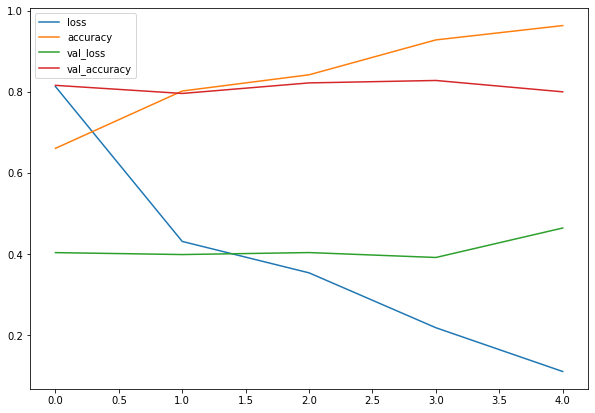

In [20]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [47]:
# Plot validation and training curves separately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()
  

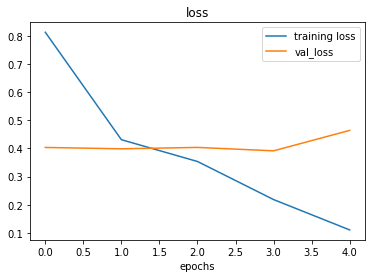

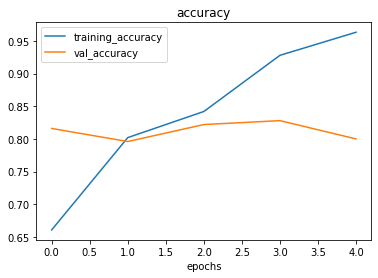

In [22]:
plot_loss_curves(history_4)

Hmm, judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.
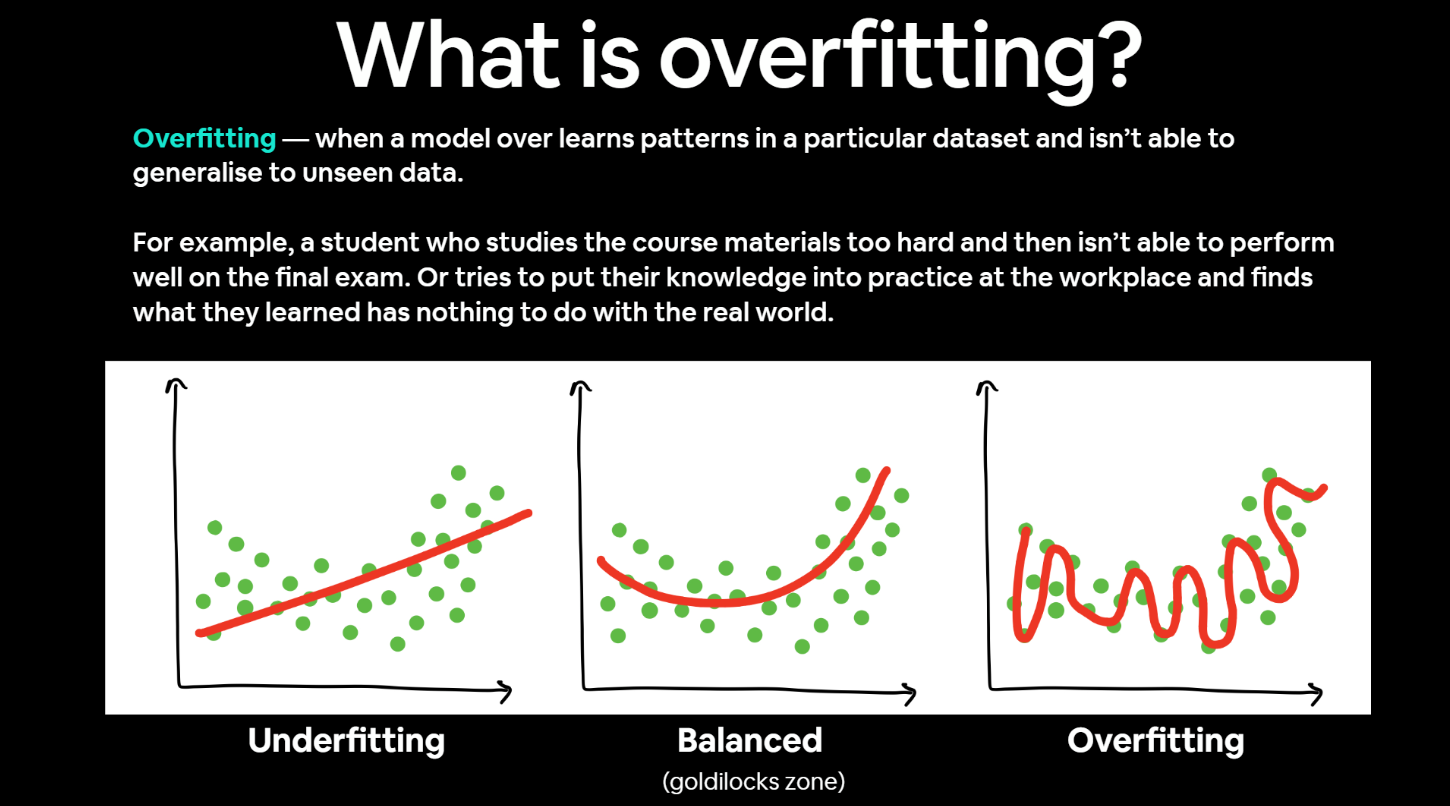

### 6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Let's built it. It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [23]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [24]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [25]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

In [26]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6072 - accuracy: 0.6760 - val_loss: 0.5394 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4918 - accuracy: 0.7833 - val_loss: 0.3904 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4256 - accuracy: 0.8087 - val_loss: 0.3801 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4421 - accuracy: 0.7967 - val_loss: 0.3516 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3787 - accuracy: 0.8413 - val_loss: 0.3439 - val_accuracy: 0.8480


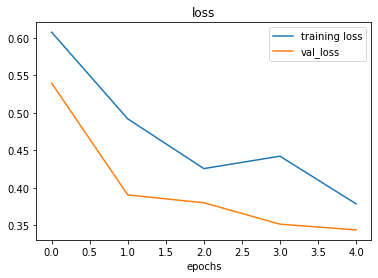

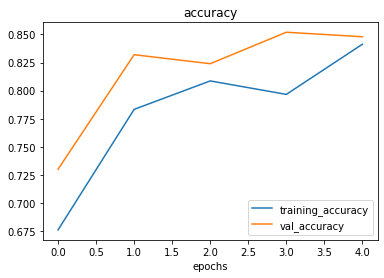

In [27]:
plot_loss_curves(history_5)

### 6. Opening our bags of tricks and finding data augmentation


In [28]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [30]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size= 32,
                                                                   class_mode ="binary",
                                                                   shuffle = False)
# Create non augmented batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,244),
                                               class_mode= "binary",
                                               batch_size=32,
                                               shuffle = False)

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              batch_size = 32)

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [42]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

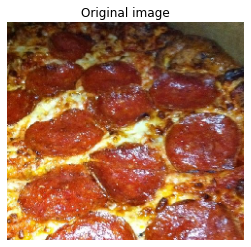

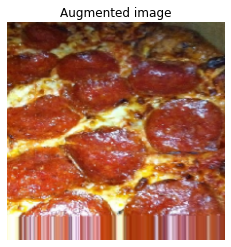

In [44]:
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [46]:
model_6 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',
                optimizer= Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 467ms/step - loss: 0.7106 - accuracy: 0.5100 - val_loss: 0.6946 - val_accuracy: 0.4500
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.6980 - accuracy: 0.4507 - val_loss: 0.6881 - val_accuracy: 0.4960
Epoch 3/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6920 - accuracy: 0.5067 - val_loss: 0.6820 - val_accuracy: 0.5100
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6816 - accuracy: 0.5673 - val_loss: 0.6770 - val_accuracy: 0.6220
Epoch 5/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6695 - accuracy: 0.6273 - val_loss: 0.6360 - val_accuracy: 0.6340


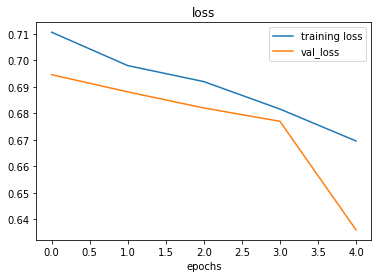

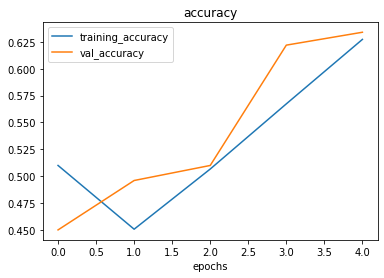

In [48]:
plot_loss_curves(history_6)

 Let's Shuffle our augmented data and train data another model


In [51]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size= 32,
                                                                   class_mode ="binary",
                                                                   shuffle = True)
# Create non augmented batches
train_data_shuffled = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,244),
                                               class_mode= "binary",
                                               batch_size=32,
                                               shuffle = True)

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              batch_size = 32)

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [53]:
model_7 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_7.compile(loss = 'binary_crossentropy',
                optimizer= Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6434 - accuracy: 0.6153 - val_loss: 0.5469 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 22s 469ms/step - loss: 0.5121 - accuracy: 0.7333 - val_loss: 0.3786 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5011 - accuracy: 0.7580 - val_loss: 0.3680 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 21s 453ms/step - loss: 0.4981 - accuracy: 0.7540 - val_loss: 0.3934 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.4693 - accuracy: 0.7780 - val_loss: 0.3453 - val_accuracy: 0.8480


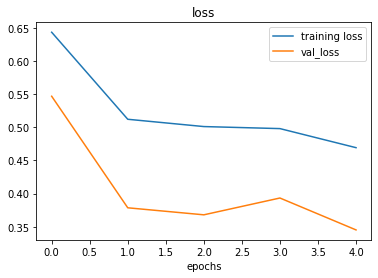

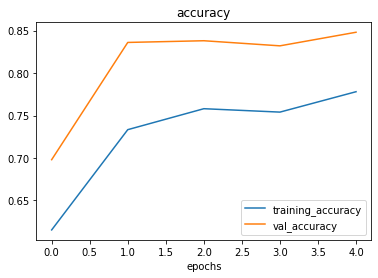

In [54]:
plot_loss_curves(history_7)

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (`model_1` or the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/)).
